<a href="https://colab.research.google.com/github/Emmanuel461/PML_2023_2024/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Call the data of wine quality

The [Wine quality data set](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) available in Kaggle. It has 12 explanatory variables and the label is the wine quality.

    Input variables (based on physicochemical tests):\
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)

# Load and see the structure of the data

In [4]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
wine = pd.read_csv('/content/drive/MyDrive/Machine_learning/Homework9/WineQT.csv')
wine.head()
wine.shape

(1143, 13)

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

features = wine.columns[:-2]  # Exclude 'quality' and 'Id' columns
x = wine[features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, wine[['quality']]], axis=1)

final_df.head()
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


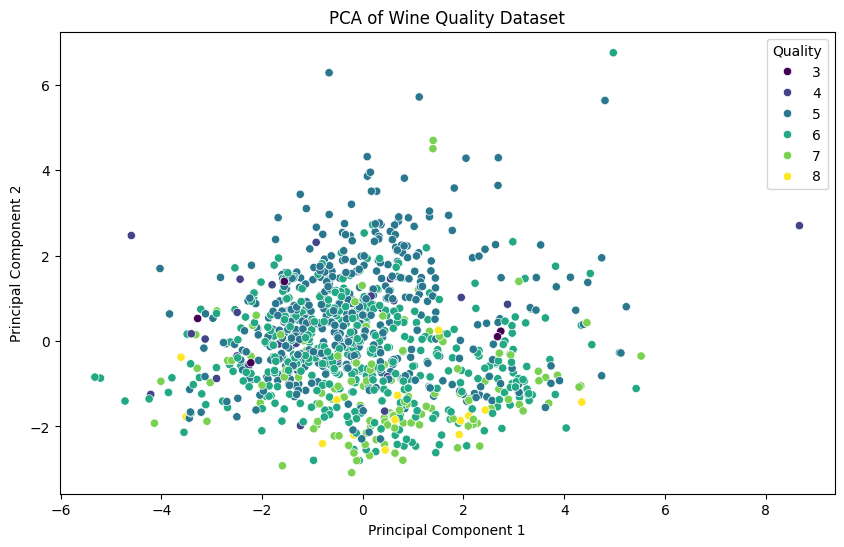

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', palette='viridis', data=final_df)
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()


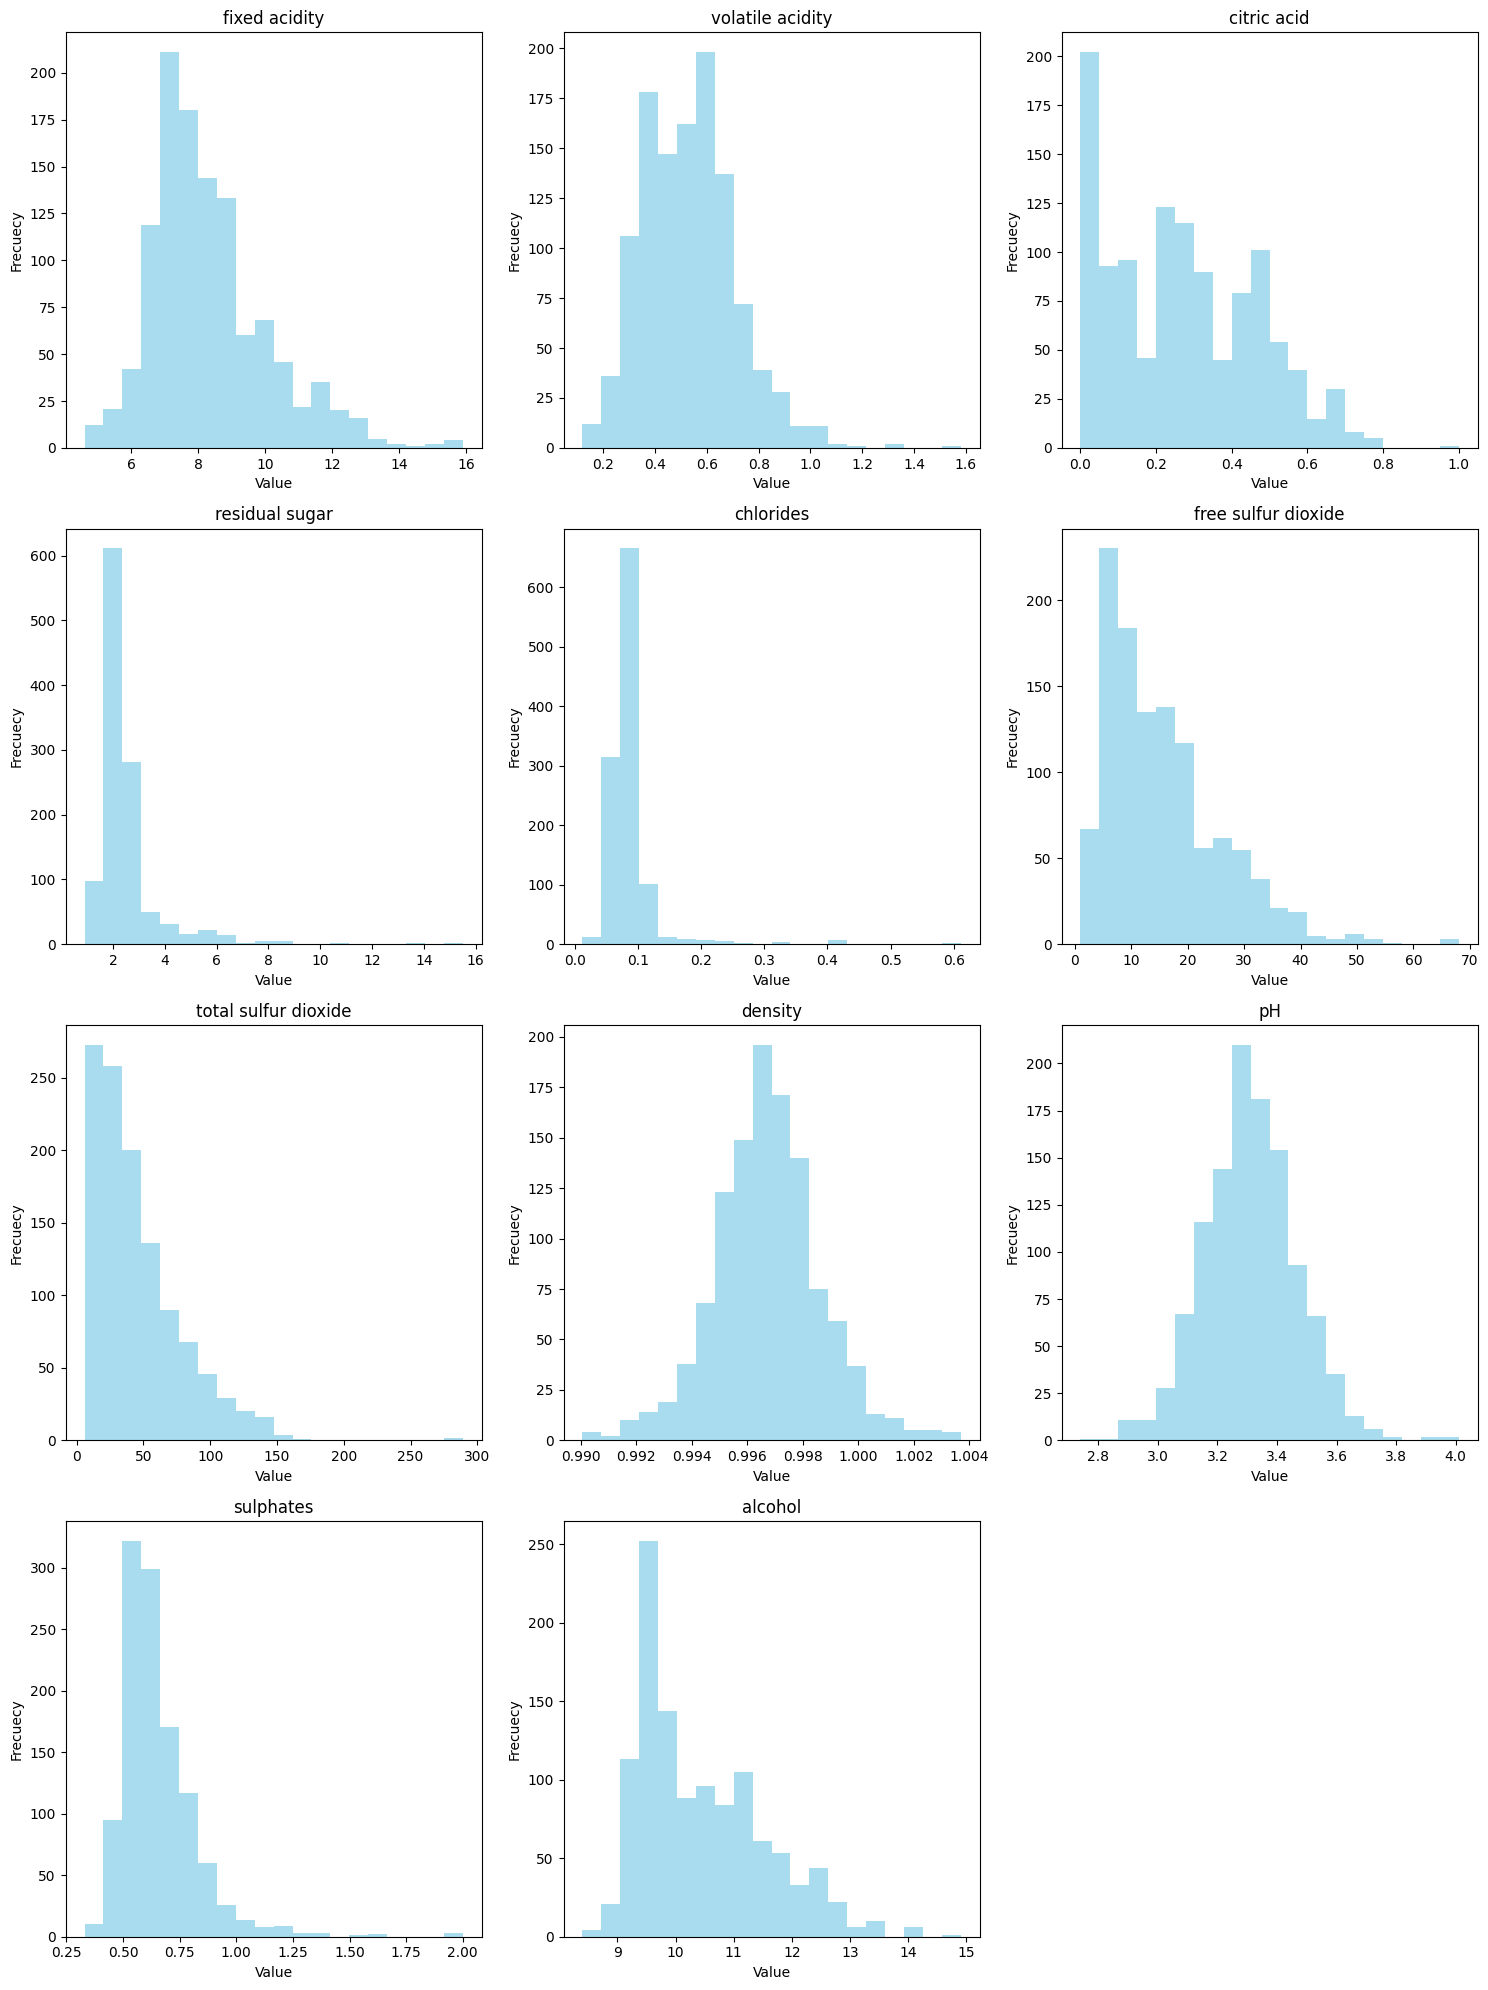

In [13]:

# Preparar los datos
X = wine.drop(columns=['quality', 'Id'])
y = wine['quality']


def plot_histograms(X):
    num_features = X.shape[1]
    num_cols = 3  # Número deseado de histogramas por fila

    # Calcular el número de filas necesario
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

    # Histogramas para las características de entrada (X)
    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].hist(X.iloc[:, i], bins=20, color='skyblue', alpha=0.7)
        axes[row, col].set_title(X.columns[i])
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Frecuecy')

    # Eliminar los ejes vacíos si hay menos de num_cols * num_rows características
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Uso de la función
plot_histograms(X)


<ipython-input-14-30237dc63c3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')


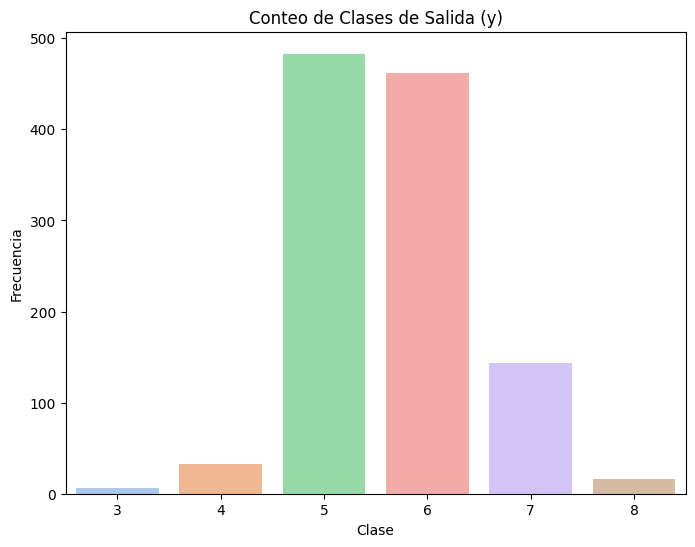

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [14]:
def plot_y_histogram(y):
    class_counts = y.value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
    plt.title('Conteo de Clases de Salida (y)')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.show()

# Uso de la función
plot_y_histogram(y)

class_counts = y.value_counts().sort_index()
class_counts.head(6)


In [15]:
from scipy.stats import shapiro

def normality_test(X):
    normality_results = []
    for column in X.columns:
        stat, p_value = shapiro(X[column])
        normality_results.append({
            'Variable': column,
            'Statistic': stat,
            'p-value': p_value,
            'Normality (p > 0.05)': p_value > 0.05
        })

    return pd.DataFrame(normality_results)

# Preparar los datos
X = wine.drop(columns=['quality', 'Id'])
y = wine['quality']

# Aplicar la prueba de normalidad
normality_results = normality_test(X)

# Definir H0 y p-value threshold
print("Hipótesis nula (H0): La muestra sigue una distribución normal.")
print("Si p-value > 0.05, no se puede rechazar H0 (la muestra es normal).")
print("Si p-value <= 0.05, se rechaza H0 (la muestra no es normal).")
print("\nResultados de la prueba de normalidad:\n")
print(normality_results)


Hipótesis nula (H0): La muestra sigue una distribución normal.
Si p-value > 0.05, no se puede rechazar H0 (la muestra es normal).
Si p-value <= 0.05, se rechaza H0 (la muestra no es normal).

Resultados de la prueba de normalidad:

                Variable  Statistic       p-value  Normality (p > 0.05)
0          fixed acidity   0.936709  1.238490e-21                 False
1       volatile acidity   0.974215  2.130749e-13                 False
2            citric acid   0.953222  1.273572e-18                 False
3         residual sugar   0.587291  1.401298e-45                 False
4              chlorides   0.469274  0.000000e+00                 False
5    free sulfur dioxide   0.902308  2.199898e-26                 False
6   total sulfur dioxide   0.863261  2.073521e-30                 False
7                density   0.990698  1.248830e-06                 False
8                     pH   0.992115  8.658012e-06                 False
9              sulphates   0.824078  1.264980e-3

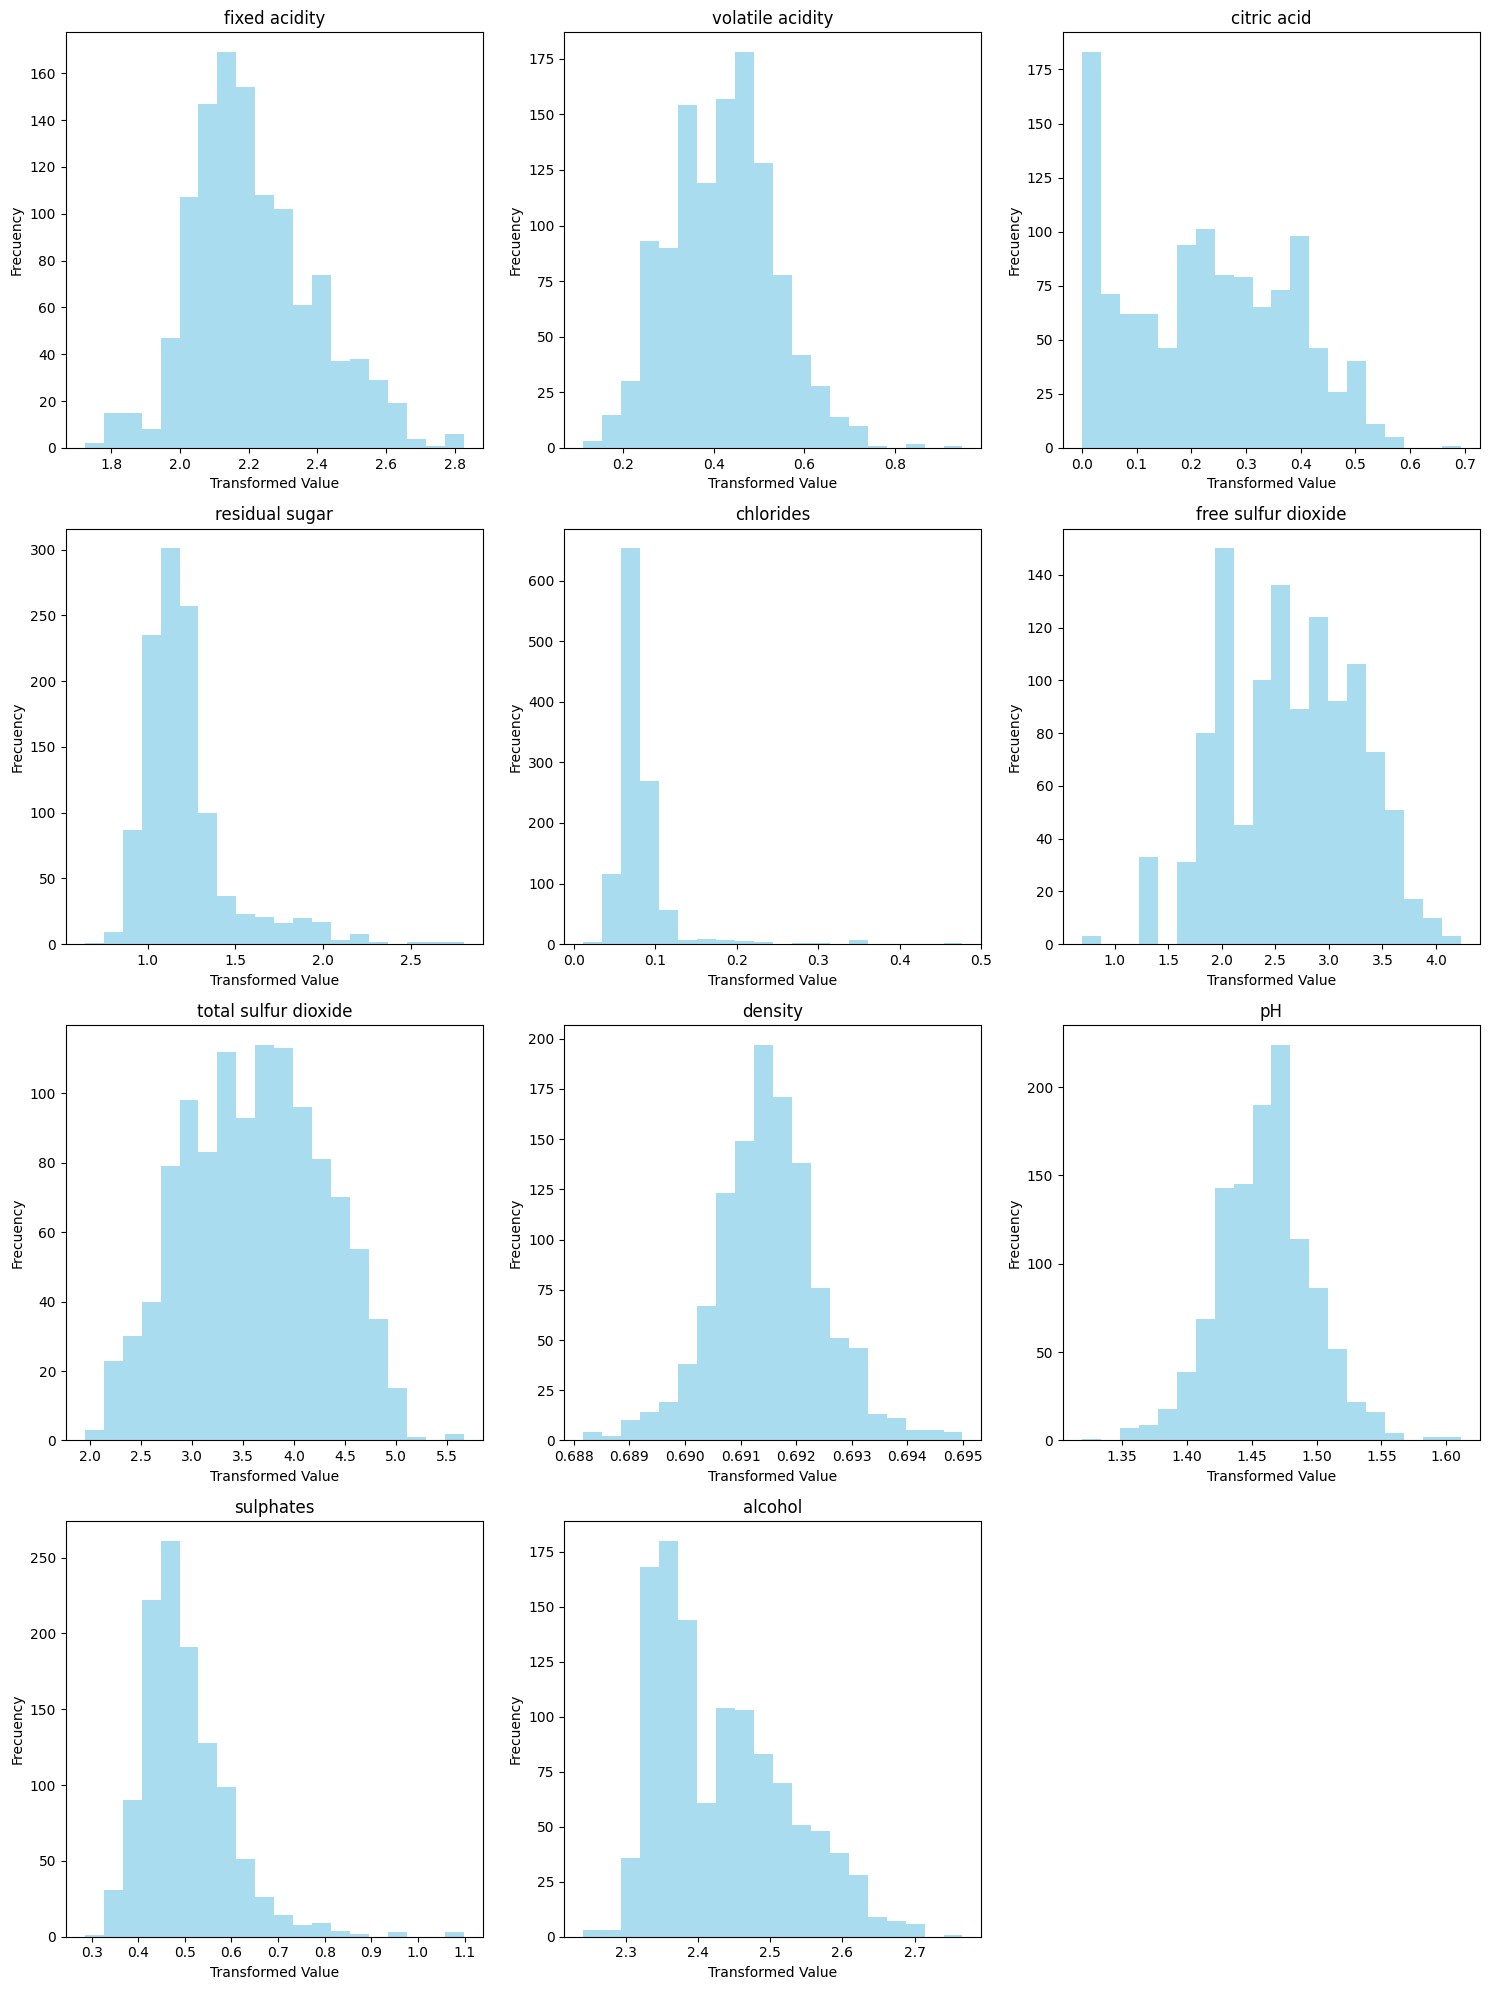

In [16]:
# Preparar los datos

X_log = np.log1p(X)

def plot_histograms(X):
    num_features = X.shape[1]
    num_cols = 3  # Número deseado de histogramas por fila

    # Calcular el número de filas necesario
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

    # Histogramas para las características de entrada (X)
    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].hist(X.iloc[:, i], bins=20, color='skyblue', alpha=0.7)
        axes[row, col].set_title(X.columns[i])
        axes[row, col].set_xlabel('Transformed Value')
        axes[row, col].set_ylabel('Frecuency')

    # Eliminar los ejes vacíos si hay menos de num_cols * num_rows características
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Uso de la función
plot_histograms(X_log)

# Run RF over the not-transformed data

Accuracy: 0.7161572052401747
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.85      0.79        97
           6       0.69      0.74      0.71        92
           7       0.74      0.48      0.58        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


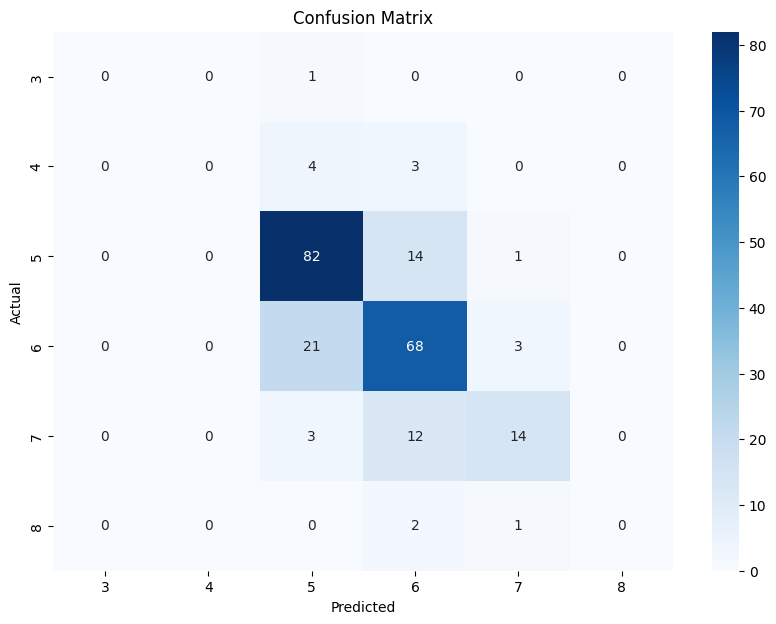

In [37]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Preparar los datos
X = wine.drop(columns=['quality', 'Id'])
y = wine['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42) #  max_leaf_nodes= 6 , max_depth = 4 ,  min_samples_split = 6
rf.fit(X_train, y_train)

# Predecir con el modelo
y_pred = rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Notes:

1. A descrease in the max_depth descrease the global accuracy (to 55%).
2. If leave the max_depth by default the accuracy increase to 77%.
3. The max_leaf_nodes= 6 decrease the accuracy of the results to 61%.
4. One problem is that the class 3 and 8 that have less sample values if we compared it with the other classes.
5. The min_samples_split don't make a big difference in the results

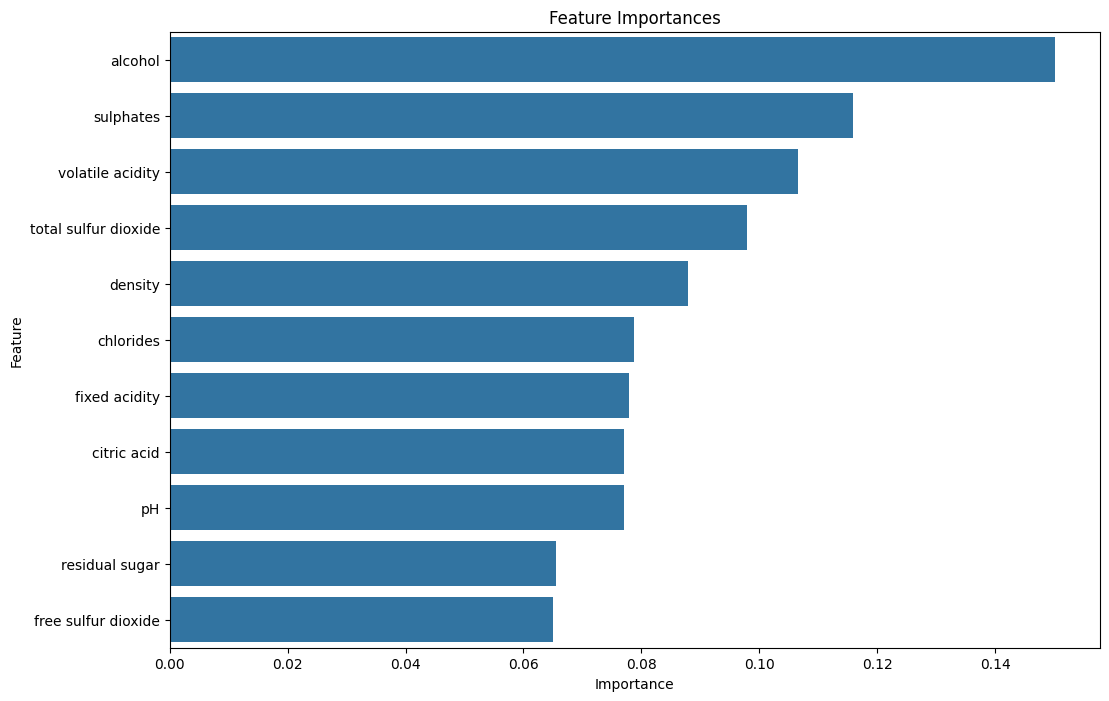

In [40]:
# Calcular las importancias de las características
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# RUN RF over the transfomed data

Accuracy: 0.7161572052401747
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.73      0.71        92
           7       0.74      0.48      0.58        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


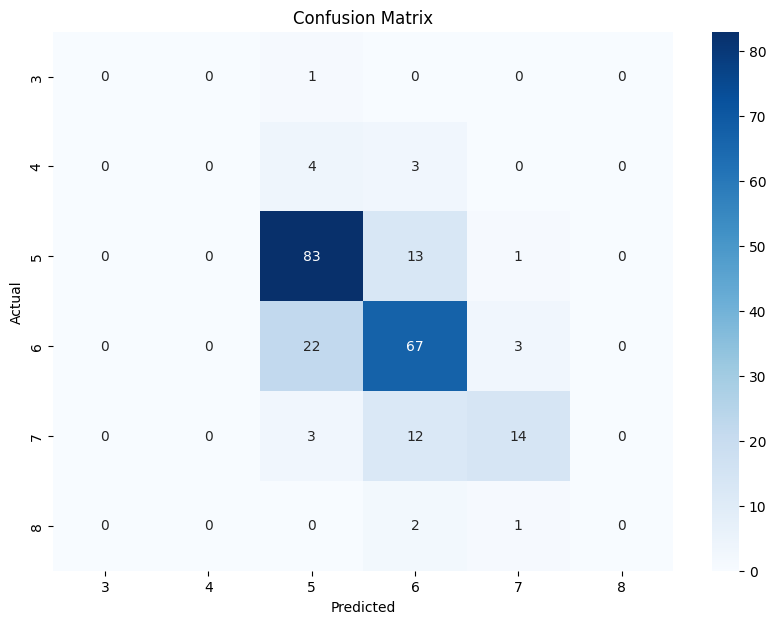

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar los datos
X = wine.drop(columns=['quality', 'Id'])
y = wine['quality']

# Aplicar la transformación logarítmica
X_log = np.log1p(X)  # log1p es más estable que log y maneja valores cercanos a cero

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # max_leaf_nodes= 6 , max_depth = 4 ,  min_samples_split = 6
rf.fit(X_train, y_train)

# Predecir con el modelo
y_pred = rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Notes:

1. Here the min_sample_split = 6 show a better result
2. max_leaf_nodes= 6 increase the error if we compare with the default and with more few values.
3. The same aspect with max_depth = 4.

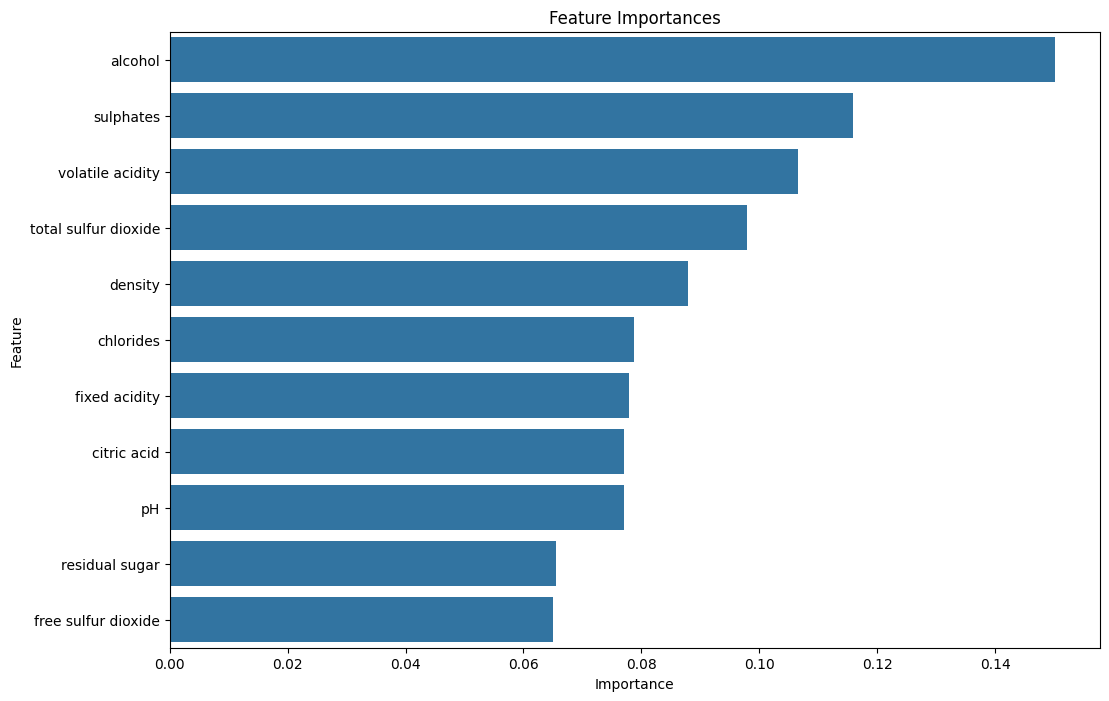

In [39]:
# Calcular las importancias de las características
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()